In [21]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('FyntraCustomerData.csv')
data.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [29]:
data.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [36]:
len(data['Avatar'].unique())

138

In [12]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


# 1.

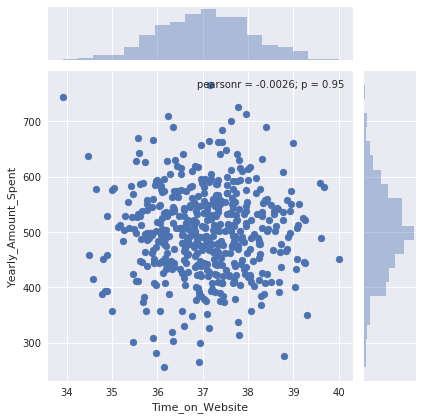

In [13]:
sns.jointplot(x='Time_on_Website',y='Yearly_Amount_Spent',data=data)

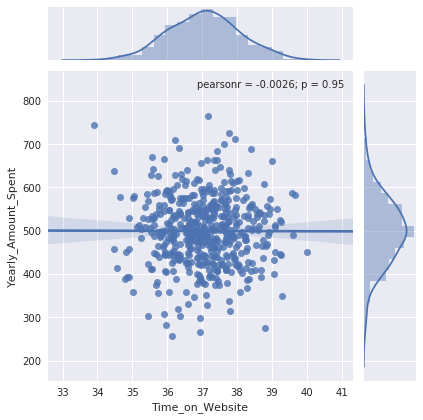

In [14]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot(x='Time_on_Website',y='Yearly_Amount_Spent',data=data, kind='reg').annotate(stats.pearsonr)
plt.show()

So Time_on_website and Yearly_spend_amount are not corelated since p value is very much close to zero.

# 2.

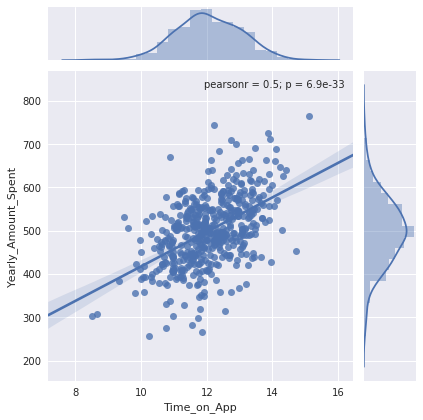

In [15]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot(x='Time_on_App',y='Yearly_Amount_Spent',data=data, kind='reg').annotate(stats.pearsonr)
plt.show()

So Time_on_website and Yearly_spend_amount have correlation stronger than 1stOne.

# 3.

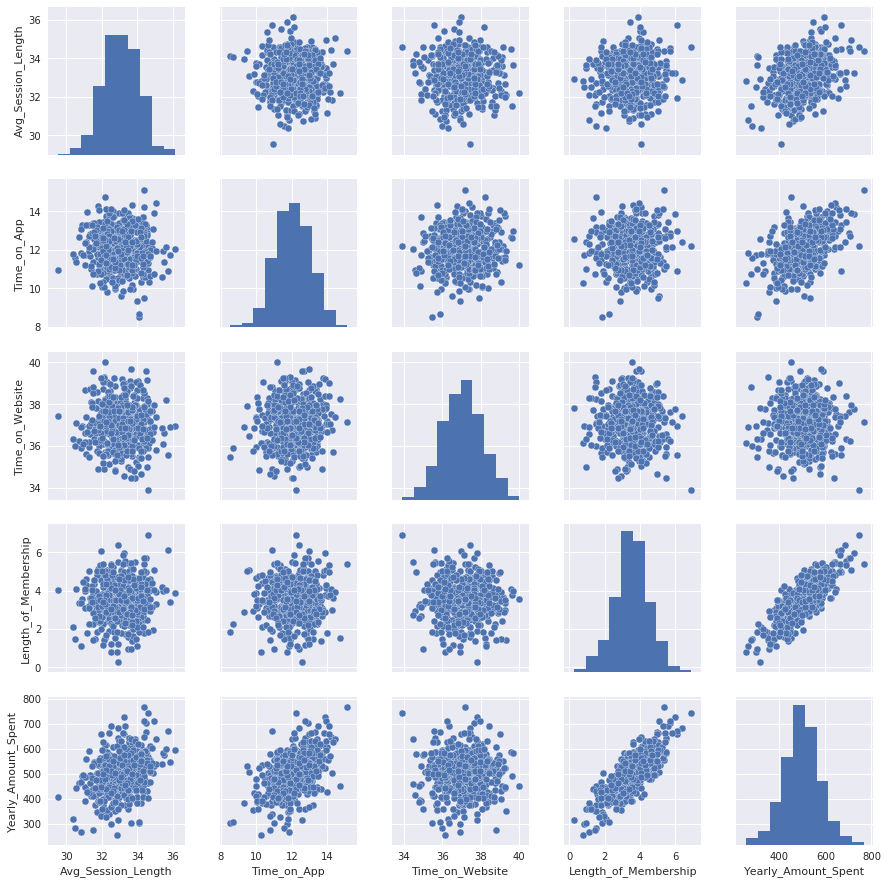

In [18]:
sns.pairplot(data)

In [22]:

# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

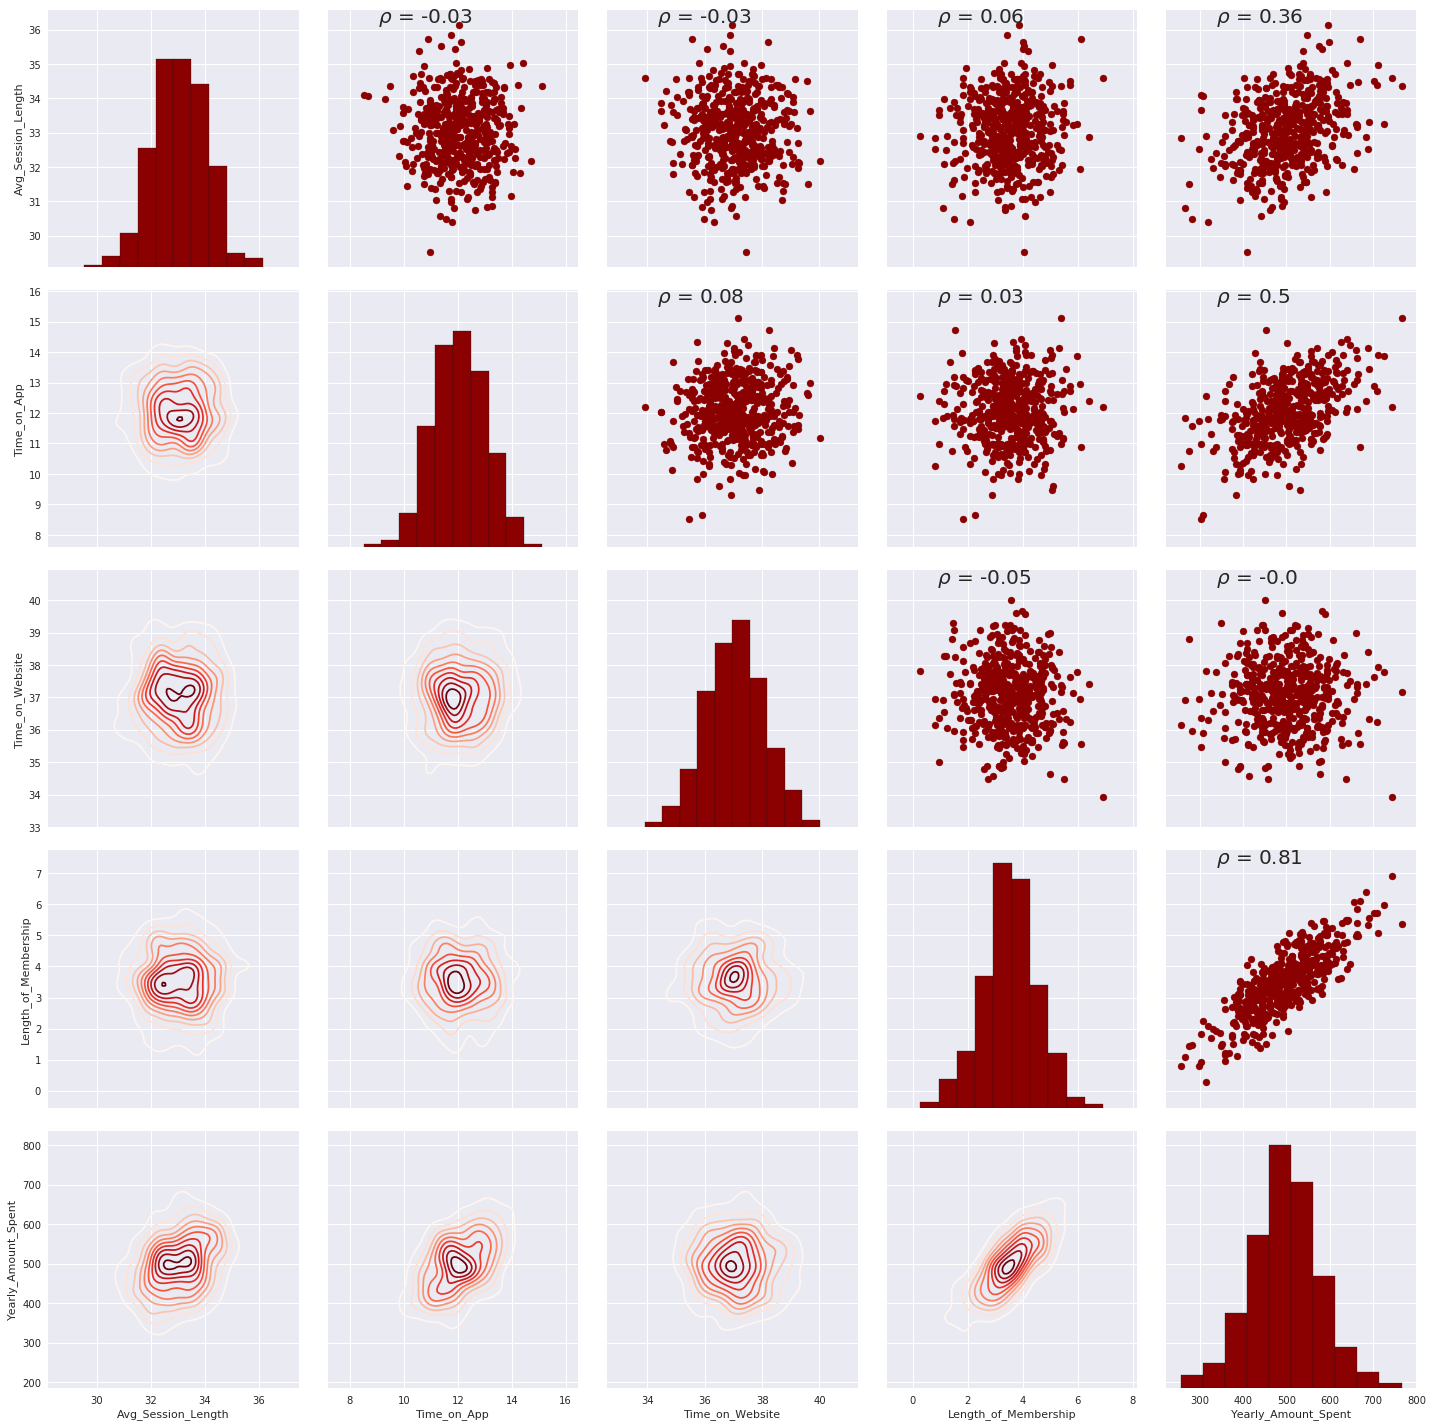

In [25]:
# Create a pair grid instance
grid = sns.PairGrid(data=data,
                    vars = ['Avg_Session_Length', 'Time_on_App', 'Time_on_Website', 'Length_of_Membership','Yearly_Amount_Spent'], size = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred')

So Lenght_of_membership feature is mostly corelated with year_amount_spend.

# 4.

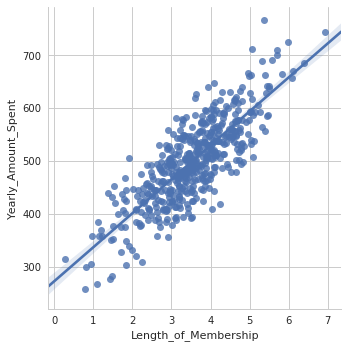

In [26]:
sns.set_style('whitegrid') 
sns.lmplot(x ='Length_of_Membership', y ='Yearly_Amount_Spent', data = data) 

# 5,6,7,8.

In [85]:
x = data.iloc[:,3:7]
y = data.iloc[:,7]


In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=85)

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
model.score(x_train,y_train)

0.9848694990595016

In [89]:
model.score(x_test,y_test)

0.9809686791264653

In [90]:
y_pred = model.predict(x_test)

Text(0,0.5,'y_pred')

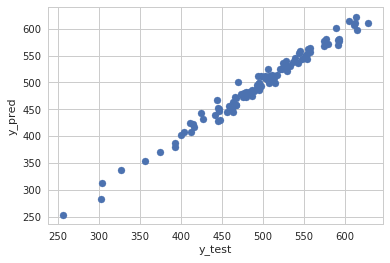

In [103]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test') 
plt.ylabel('y_pred') 

In [ ]:

sns.relplot(x="y_", y="Upvotes", data = df)

In [104]:
'''import matplotlib.pyplot as plt
import pandas as pd
girls_grades = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.scatter(grades_range, girls_grades, color='r')
plt.scatter(grades_range, boys_grades, color='g')
plt.xlabel('Grades Range')
plt.ylabel('Grades Scored')
plt.show()'''

"import matplotlib.pyplot as plt\nimport pandas as pd\ngirls_grades = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]\nboys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]\ngrades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]\nplt.scatter(grades_range, girls_grades, color='r')\nplt.scatter(grades_range, boys_grades, color='g')\nplt.xlabel('Grades Range')\nplt.ylabel('Grades Scored')\nplt.show()"

According to scatter plot predcited and test data doesnt match always.

In [93]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 9.748641229131575


In [96]:
model.coef_
model.coef_.tolist()
pd.DataFrame(list(zip(coefficients,model_features)),columns=['names','coefficients'])

,names,coefficients
0,25.947252,Avg_Session_Length
1,39.066821,Time_on_App
2,0.682530,Time_on_Website
3,61.334694,Length_of_Membership


So according to coefficients company should focus on App rather than website. 